In [1]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 435.7 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.8 MB 558.5 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.8 MB 1.0 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.8 MB 1.4 MB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.8 MB 1.5 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.8 MB 2.3 MB/s eta 0:00:01
   --------------------- ------------------ 1.0/1.8 MB 2.6 MB/s eta 0:00:01
   -------------------------------- ------- 1.5/1.8 MB 3.6 MB/s eta 0:00:01
   ------------------------------------- -- 1.7/1.8 MB 3.7 MB/s eta 0:00:01
   ------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras --upgrade

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
   ------------------------------------ --- 1.0/1.1 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 3.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.1.1
    Uninstalling keras-3.1.1:
      Successfully uninstalled keras-3.1.1


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [5]:
(xtrain,ytrain),(xtest,ytest)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 29s 0us/step


In [6]:
xtrain.shape

(50000, 32, 32, 3)

In [7]:
ytrain[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [8]:
ytest=ytest.reshape(-1,)

In [9]:
ytest

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [11]:
siniflar=["uçak","otomobil","kuş","kedi","geyik","köpek","kurbağa","at","gemi","kamyon"]

In [12]:
def ornek(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(siniflar[y[index]])

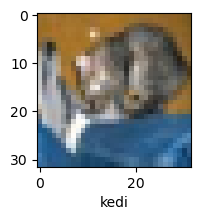

In [13]:
ornek(xtest,ytest,0)

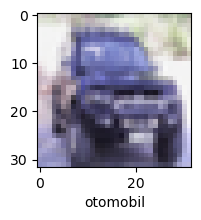

In [14]:
ornek(xtest,ytest,9)

In [15]:
xtrain=xtrain/255
xtest=xtest/255

In [16]:
model=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")

])

C:\Users\HUAWEI\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [18]:
model.fit(xtrain,ytrain,epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.3693 - loss: 1.7295
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5894 - loss: 1.1719
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6477 - loss: 1.0196
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6752 - loss: 0.9358
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7008 - loss: 0.8644
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7155 - loss: 0.8211
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7358 - loss: 0.7680
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7461 - loss: 0.7416
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7568 - loss: 0.6997
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7703 - loss: 0.6625
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7821 - loss: 0.6271
Epoch 12

In [19]:
model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6790 - loss: 1.0118


[1.0147342681884766, 0.6822999715805054]

In [20]:
ypred=model.predict(xtest)
ypred[:3]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[4.1530620e-05, 1.8772990e-02, 8.8788307e-05, 7.6542062e-01,
        7.5626938e-04, 2.1299522e-01, 1.3487232e-03, 7.7607374e-06,
        3.4809581e-04, 2.1995233e-04],
       [9.4844783e-03, 9.1412890e-01, 2.4598985e-05, 8.7079788e-06,
        2.3307092e-09, 1.0757677e-09, 1.9591130e-08, 5.1157495e-10,
        7.6021992e-02, 3.3127217e-04],
       [1.5486783e-01, 2.4583766e-01, 4.4371649e-03, 7.5223288e-03,
        1.0315197e-03, 4.2391155e-04, 5.1971036e-04, 6.5633263e-05,
        5.5089360e-01, 3.4400579e-02]], dtype=float32)

In [21]:
ypred1=[np.argmax(element) for element in ypred]
ypred1[:3]

[3, 1, 8]

In [22]:
ypred1[:10]

[3, 1, 8, 0, 4, 6, 9, 2, 3, 1]

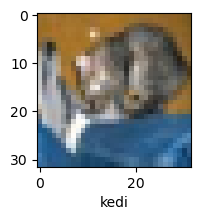

In [24]:
ornek(xtest,ytest,0)

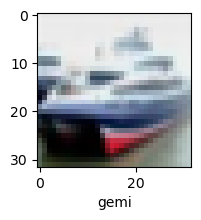

In [25]:
ornek(xtest,ytest,1)